# Handling skewed data

If we want to perform a `linear regression model` to make predictions on our data, the model makes the following assumptions:
- **Linearity:** assumes that the relationship between predictors and target variable is linear
- **No noise:** eg. that there are no outliers in the data
- **No collinearity:** if you have highly correlated predictors, it’s most likely your model will overfit
- **Normal distribution:** more reliable predictions are made if the predictors and the target variable are normally distributed. With the use of Q-Q plot, we can investigate if data are normally distributed. If they are, they fall onto the linear line, otherwise they diverge
- **Scale:** it’s a distance-based algorithm, so preditors should be scaled — like with standard scaler

3 methods to transform skewed data into a linear distribution:

1. log transform
2. square root transform
3. box-cox trandform

Keep in mind that the methods described above work only for positve (right tale) skewed data and NOT for negative (left tale) skewed data. For negative skewed data do the following:
1. take the max value of the feature
2. add the expression: `1+max - df['feature']`
3. convert the the transformed data (from 2) into normally distributed

[source: negative skewed](https://www.youtube.com/watch?v=kgvKGOqsPd8)

### Transforming negative values
[stackoverflow](https://stats.stackexchange.com/questions/155429/how-to-transform-negative-values-to-logarithms)

In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
X = boston['data']
Y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(X, columns=cols)
df['price'] = Y

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check columnn names for skewed distributions

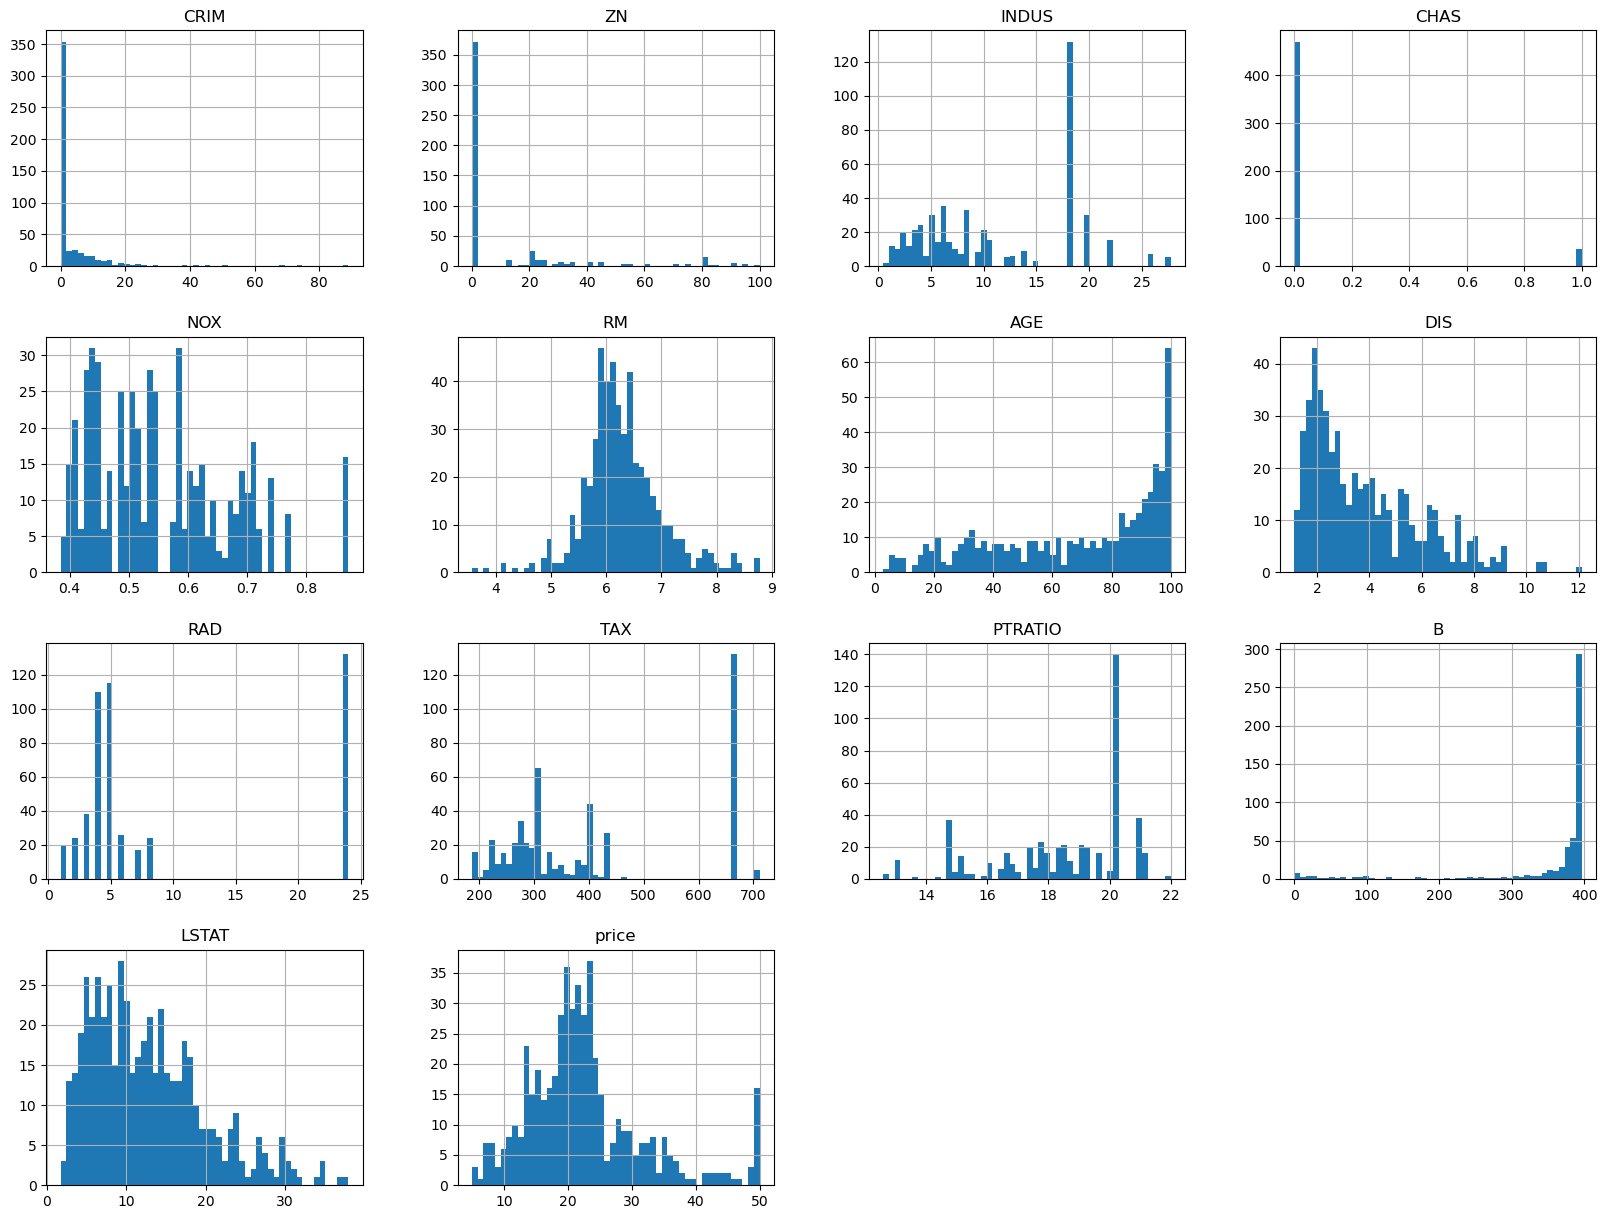

In [27]:
df.hist(bins=50, figsize=(20,15));

### Check how much skew there is for each feature name

- The closer the skew value is to zero, the more normally distributed the data is
- Negative values indicate the data is skewed to the left. The higher the negative value the the more skewed the data is
- Positive values indicate the data is skewed to the right. The higher the value the the more skewed the data is

In [45]:
for k,v in df.items():
    print (f" {k}:  {df[k].skew()}")

 CRIM:  5.223148798243851
 ZN:  2.2256663227354307
 INDUS:  0.29502156787351164
 CHAS:  3.405904172058746
 NOX:  0.7293079225348787
 RM:  0.40361213328874385
 AGE:  -0.5989626398812962
 DIS:  1.0117805793009007
 RAD:  1.0048146482182057
 TAX:  0.669955941795016
 PTRATIO:  -0.8023249268537809
 B:  -2.8903737121414492
 LSTAT:  0.9064600935915367
 price:  1.1080984082549072


### Use probability plots (Q-Q plots)

- A proabbility plot compares the theoretical quantiles (assuming a perfect normal distribution) against the observed values (distribution of our data)
- The normal distribution is symetric where the highest density of the data falls within 1 std. When the normally distributed data are plotted on Q-Q plot, they form a straight line.
- Data that are not normally distributed, they form a curve when plotted on the Q-Q plot. They deviate from the straight line. The further away the observed values are from the line, the more skewed the data are

In [59]:
df_copy = df.copy()

In [60]:
def normal_distribution(mean, sigma):
    '''Create data sample that follows a normal distribution
    '''
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    sample = np.random.normal(mean, sigma, 10000)
    return sample

def plot(df, col):
    '''Plot skewed data along with its Q-Q plot
    '''
    plt.figure(figsize=(12,3))
    # create normally distributed data
    s = normal_distribution(mean=0, sigma=1)
    name = f"{col} standardised"
    df[name] = (df[col] - df[col].mean())/(df[col].std())
    
    ax1 = plt.subplot(1,2,1)
    sns.histplot(s,bins=25, stat="density", binwidth=0.1, color='r',label='Normal Distribution',ax=ax1)
    sns.histplot(data=df, x=name, binwidth=0.1, stat="density",color='b',label=f"{col} Distribution",alpha=0.4, ax=ax1)
    
    ax2 = plt.subplot(1,2,2)
    res = stats.probplot(df[name], plot=plt)
    ax1.set_title('Histogram')
    ax1.legend()
    plt.show()


#### Left skewed

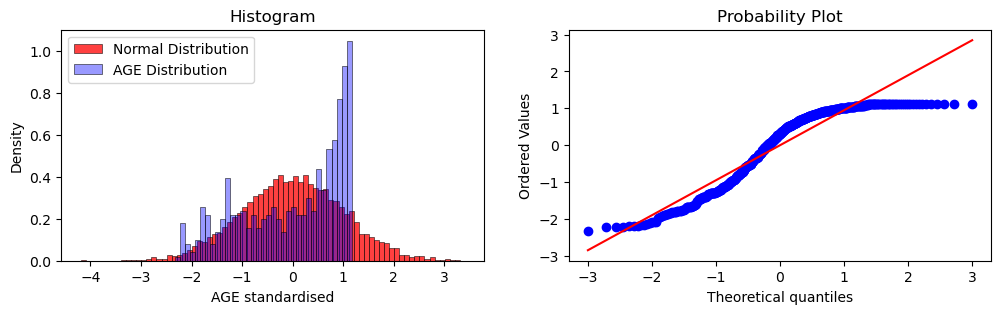

In [61]:
plot(df_copy, col='AGE')

#### Right skewed

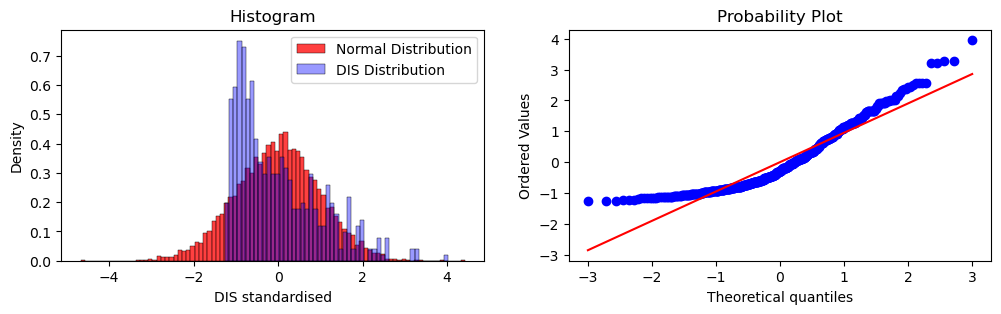

In [62]:
plot(df_copy, col='DIS')

#### Normally distributed

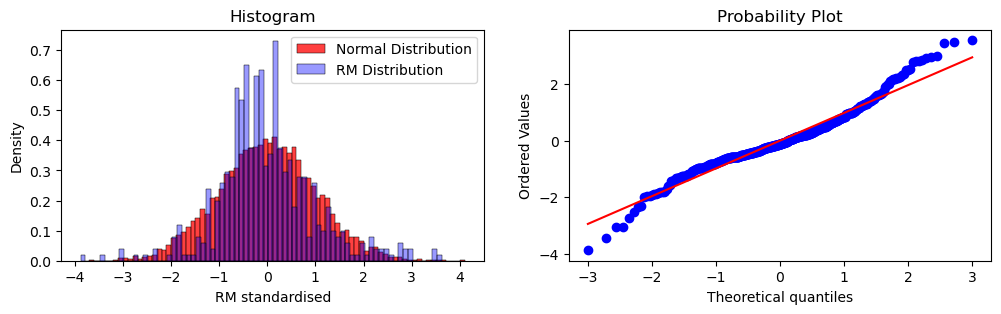

In [29]:
plot(df_copy, col='RM')

- For the first two graphs (left and right skewed) we can see that the observed values (blue line) deviates from the linear red line. THis indicates that that the data are not normally distributed. When we look at the histograms where the observed distribution is compared with the simulated normal dstribution, the tail of the observed histogramdoes not follow a Gaussian distribtion. This is why in the probability plot we see deviation of the blue line at the lower and upper quartiles

- For the last graph, we see most of the blue points fall on the red line which indicates this data is more normally distributed compared to the data on the other plots

### Boxplot

A boxplot can show whether dataset is symmetric (roughly the same on each side when cut down the middle) or skewed (lopised). A symmetric dataset shows the median in the middle of the box. When data is skewed, the median cuts the box into two unequal pieces. If the longer part of the box is above (or to the right) the median the data is skewed right. If the longer part of the box is below (or to the left) the median the data is skewed left.

Each section of the boxplot contaisn 25% of teh data. If one section is longer than the other one, it indicates a wider range in the values of the data

Due to the fact that the boxplot uses the IQR (Q3-Q1), it ignores data below 25th percentaile or above 75th which may contain outliers. So, if the data is skewed, the IQR is a more appropriate measure of variability than the standard deviation

- [Boxplot explained](https://builtin.com/data-science/boxplot)

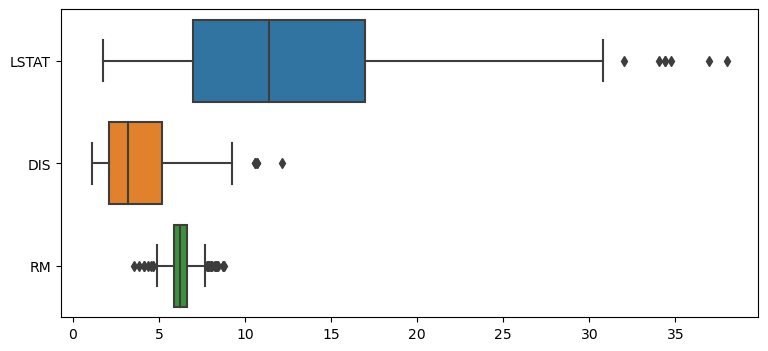

In [46]:
fig, ax = plt.subplots(1, figsize=(9,4))
sns.boxplot(data=df[['LSTAT','DIS','RM']], orient='h');

From the boxplot we can see that the feature **LSTAT** and **DIS** are right skewed (longer part of the box is on the right). The LSTAT feature has more outliers compared to the other features. The **RM** feature on the other hand is more norally distributed with some outliers on either side

### Shapiro-Wilk test

Using Shapiro, we can test the normalty of the data. If the **p-value** is less than 0.05, we reject the null hypothesis and assume the the data are not normally distributed

In [130]:
for k,v in df_copy.items():
    print(f"{k}: {stats.shapiro(df_copy[k])[1]}")

CRIM: 1.3285517473179391e-36
ZN: 7.882576753156324e-34
INDUS: 1.0641241829131273e-17
CHAS: 2.350467979135232e-40
NOX: 5.775580887027246e-14
RM: 2.4114604757485836e-10
AGE: 2.2305888882906016e-18
DIS: 2.1851281171594835e-17
RAD: 8.072442074667418e-30
TAX: 1.1629455306806005e-23
PTRATIO: 2.360196096158779e-17
B: 6.058352525766807e-36
LSTAT: 8.285112504911873e-14
price: 4.940195786292171e-16
B_box_cox: 8.858628010289214e-15
B_log: 4.993577390814913e-16
B_sqrt: 1.3625218591115627e-29
AGE standardised: 2.2309437487733868e-18
DIS standardised: 2.1851281171594835e-17


None of the above features form a normal distribution as the **p-values** are far too small

## Transform data to normal distribution

**Positive skewed:**
- Log transform
- Square root
- Box-Cox transform

**Negative skewed:**
1. transform = (1 + max(column_name)) - column_name
2. feature_log = np.log(transform)

In [6]:
def skewed_to_normal(df, feat, transform='log'):
    if transform == 'log':
        col_name = f"{feat}_log"
        df[col_name] = np.log(df[feat])
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
        
    elif transform == 'sqrt':
        col_name = f"{feat}_sqrt"
        df[col_name] = np.sqrt(df[feat])
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
        
    elif transform == 'box_cox':
        col_name = f"{feat}_box_cox"
        boxcox = stats.boxcox(df[feat])[0]
        df[col_name] = pd.Series(boxcox)
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
    return


def plot_data_transformed(feat, feat_tr):
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(11,3))
    
    sns.histplot(data=feat, bins=30, binwidth=0.4, color='b', kde=True, ax=ax1)
    sns.histplot(data=feat_tr, bins=30, binwidth=0.2, color='r', kde=True, ax=ax2)
    # answer: https://stackoverflow.com/questions/69524514/how-to-modify-the-kernel-density-estimate-line-in-a-sns-histplot
    ax1.lines[0].set_color('black')
    ax2.lines[0].set_color('black')
    
    ax1.set_title('Observed data')
    ax2.set_title('After trasformation')
    return

In [90]:
skewed_to_normal(df,'LSTAT')

Skewness: 0.9064600935915367  log transformed: -0.3202323581479543


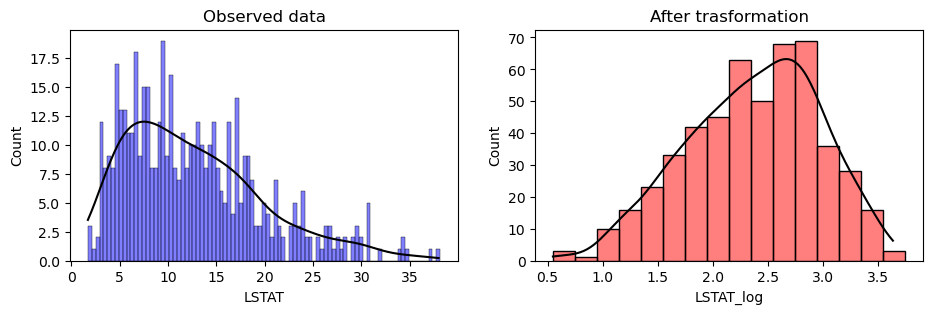

In [99]:
plot_data_transformed(df['LSTAT'], df['LSTAT_log'])

In [85]:
skewed_to_normal(df, 'LSTAT', 'sqrt')

Skewness: 0.9064600935915367  sqrt transformed: 0.30739050802674955


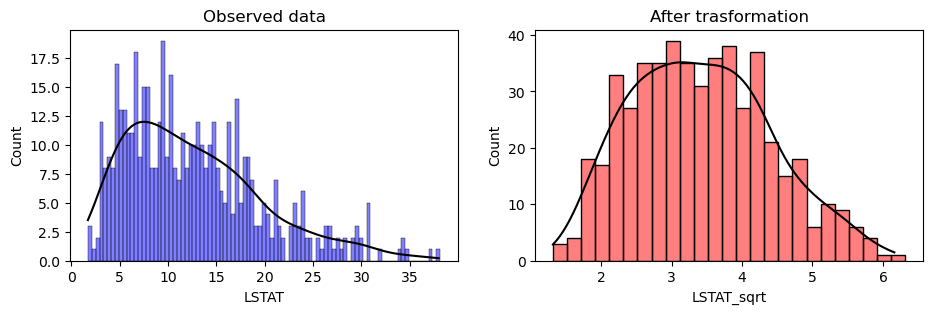

In [100]:
plot_data_transformed(df['LSTAT'], df['LSTAT_sqrt'])

In [87]:
skewed_to_normal(df, 'LSTAT', 'box_cox')

Skewness: 0.9064600935915367  box_cox transformed: -0.02788590379161234


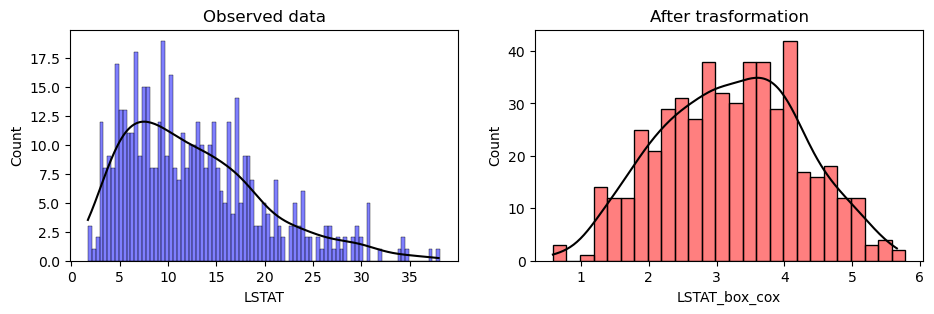

In [101]:
plot_data_transformed(df['LSTAT'], df['LSTAT_box_cox'])

The closer the skewness value is to zero the more normally distrubuted the data are. After the data transformation in all three cases, we see that the skewness gets closer to zero. Based on the examples above, the **box_cox** did a better job at transforming the data compared to the other techniques

### Negative skewed

`sources:`
- https://www.kaggle.com/getting-started/110134
- https://www.youtube.com/watch?v=kgvKGOqsPd8

In [7]:
def negative_skewed_to_normal(df, feat, transform='log'):
    max_col = df[feat].max()
    # convert data to positively skewed
    feat_positive = (max_col+1) - df[feat]
    
    if transform == 'log':
        col_name = f"{feat}_log"
        df[col_name] = np.log(feat_positive)
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
        
    elif transform == 'sqrt':
        col_name = f"{feat}_sqrt"
        df[col_name] = np.sqrt(feat_positive)
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
        
    elif transform == 'box_cox':
        col_name = f"{feat}_box_cox"
        boxcox = stats.boxcox(feat_positive)[0]
        df[col_name] = pd.Series(boxcox)
        print(f"Skewness: {df[feat].skew()}  {transform} transformed: {df[col_name].skew()}" )
    
    return


In [134]:
negative_skewed_to_normal(df, 'B')

Skewness: -2.8903737121414492   transformed: 0.6013592172677206


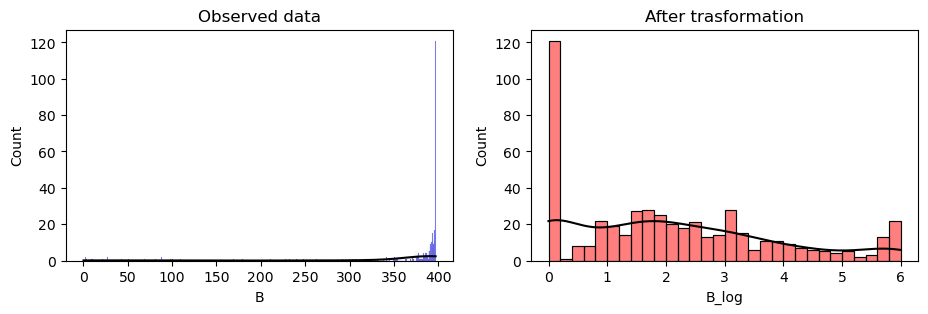

In [135]:
plot_data_transformed(df['B'], df['B_log'])

In [64]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,B_box_cox,B_log,B_sqrt
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.000000,0.000000,1.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000000,0.000000,1.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.409405,1.623341,2.251666
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.067945,1.184790,1.808314
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1.522605,1.776646,2.431049
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0.000000,0.000000,1.000000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0.000000,0.000000,1.000000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1.310622,1.492904,2.109502
